In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

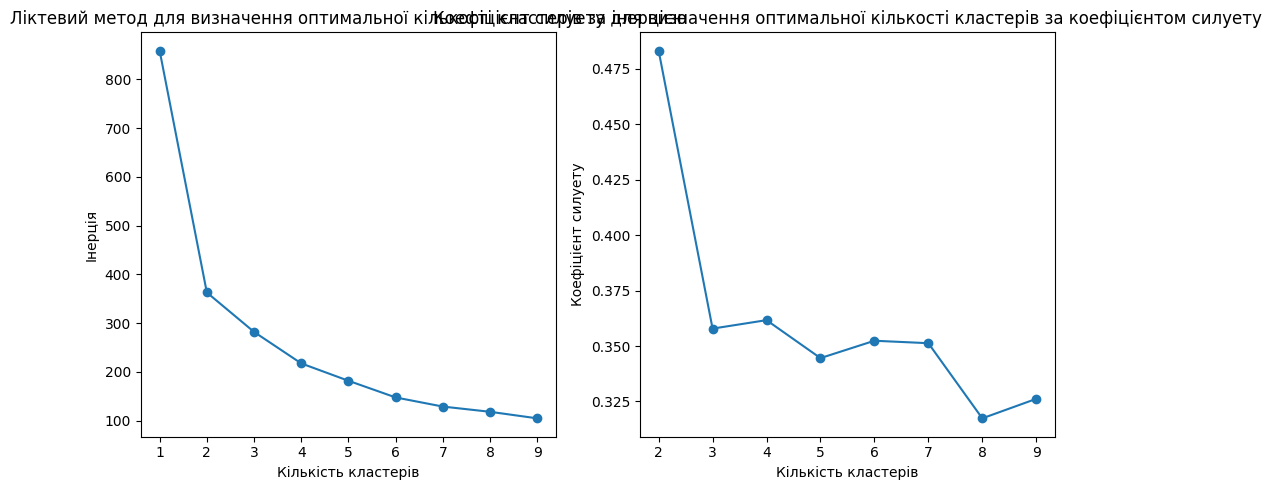

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data_2d = pd.read_csv('/content/drive/MyDrive/data_2d.csv')
data_2d.fillna(data_2d.mean(), inplace=True)
X = data_2d.values

inertia = []
silhouette = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

    if k > 1:
      silhouette_avg = silhouette_score(X, kmeans.labels_)
      silhouette.append(silhouette_avg)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Ліктевий метод для визначення оптимальної кількості кластерів за інерцією')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Коефіцієнт силуету')
plt.title('Коефіцієнт силуету для визначення оптимальної кількості кластерів за коефіцієнтом силуету')

plt.tight_layout()
plt.show()

Виходячи з показників та графіків ввжаю, що 2 -це оптимальна кількість кластерів для даного датасету

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


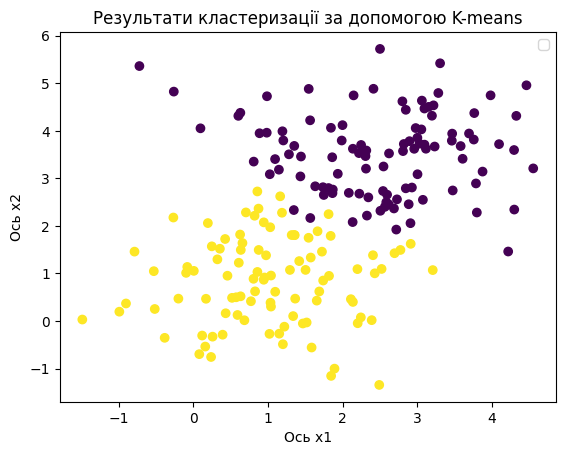

In [46]:
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(X)
data_2d['cluster'] = cluster_labels

plt.scatter(data_2d.iloc[:, 1], data_2d.iloc[:, 2],  c=cluster_labels, cmap='viridis')
plt.xlabel('Ось x1')
plt.ylabel('Ось x2')
plt.title('Результати кластеризації за допомогою K-means')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

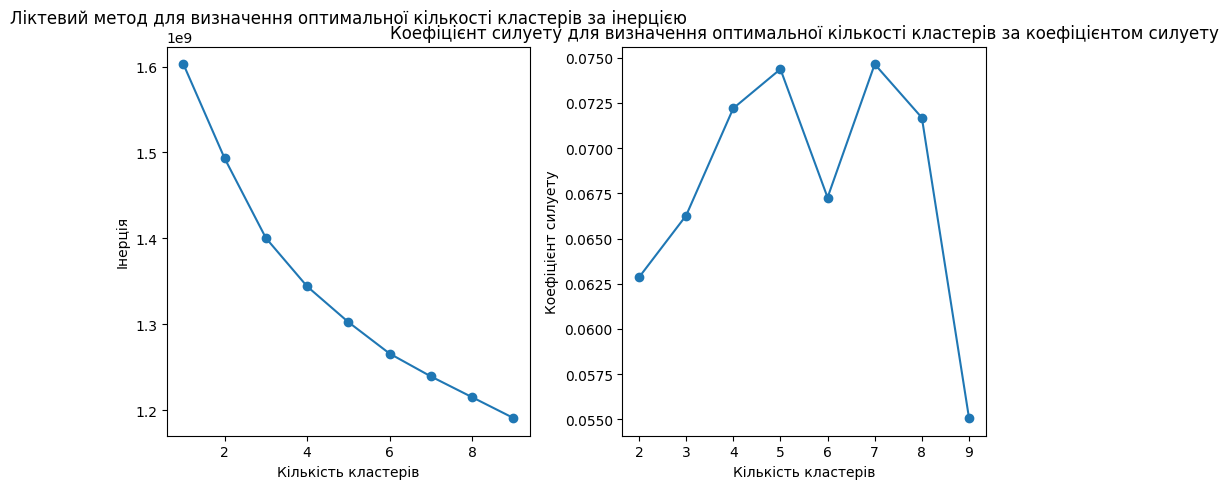

In [47]:
data_mnist = pd.read_csv('/content/drive/MyDrive/mnist.csv')
data_mnist.fillna(data_mnist.mean(), inplace=True)
X = data_mnist.values

inertia2 = []
silhouette2 = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia2.append(kmeans.inertia_)

    if k > 1:
      silhouette_avg = silhouette_score(X, kmeans.labels_)
      silhouette2.append(silhouette_avg)

plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 10), inertia2, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Ліктевий метод для визначення оптимальної кількості кластерів за інерцією')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette2, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Коефіцієнт силуету')
plt.title('Коефіцієнт силуету для визначення оптимальної кількості кластерів за коефіцієнтом силуету')

plt.tight_layout()
plt.show()



На основі графіків я обираю значення 5 для кількості кластерів - це орієнтовне місце згину локтя та точка досить високого коефіцієнту силуету


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[  -75.85472941 -1043.51804955]
 [ -969.40876294  -344.75124211]
 [ 1054.12311245  -358.6723386 ]
 [  420.94288464   671.08328811]
 [-1002.82994124  -302.4852476 ]
 [  -60.78857143   423.28985976]
 [ -172.30676971   436.62241876]
 [  182.38487629   175.92895294]
 [   93.15679927   552.55343617]
 [  950.21775297 -1011.20834377]]


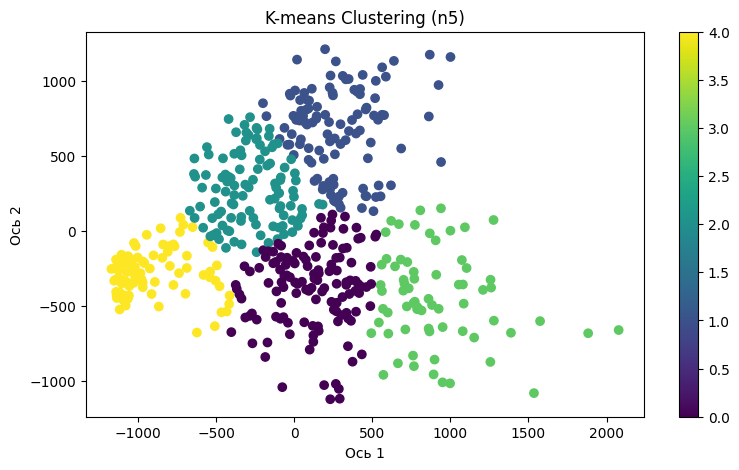

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)
print(X_pca[:10])

plt.figure(figsize=(9, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'K-means Clustering (n5)')
plt.xlabel('Ось 1')
plt.ylabel('Ось 2')
plt.colorbar()
plt.show()